1. deepfm 
    - FM + DNN 합쳐서 추천

2. 유사 이미지


In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import vgg16, resnet50
from tensorflow.keras.models import Model
from PIL import Image
import requests

from numpy import dot
from numpy.linalg import norm

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras as ks

from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('./data/pokemon.csv')

In [5]:
df

Name     Type1   Type2
0      bulbasaur     Grass  Poison
1        ivysaur     Grass  Poison
2       venusaur     Grass  Poison
3     charmander      Fire     NaN
4     charmeleon      Fire     NaN
..           ...       ...     ...
804    stakataka      Rock   Steel
805  blacephalon      Fire   Ghost
806      zeraora  Electric     NaN
807       meltan     Steel     NaN
808     melmetal     Steel     NaN

[809 rows x 3 columns]

In [7]:
path = './data/images/images/'

img = mpimg.imread(path + df['Name'][0] + '.png')


In [72]:
img = []

for i in range(len(df.index)):
    try:
        img.append(mpimg.imread(path + df['Name'][i] + '.png'))
    except:
        img.append(mpimg.imread(path + df['Name'][i] + '.jpg'))

In [73]:
len(img)

809

In [74]:
img[0].shape

(120, 120, 4)

In [30]:
# plt.imshow(img[0])

In [76]:
img = Image.open('./data/images/images/abomasnow.png')

In [202]:
for i in range(len(df.index)):
    try:
        img = Image.open(path + df['Name'][i] + '.png').convert('RGB')
    except:
        img = Image.open(path + df['Name'][i] + '.jpg').convert('RGB')
        
    resized_img = img.resize((224,224), resample = 1)
    
    resized_img.save('./data/images_resize_jpg/' + df['Name'][i] + '.jpg')

c:\ProgramData\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [36]:
path = './data/images/images/'

img_list = []

for i in range(len(df.index)):
    try:
        img = Image.open(path + df['Name'][i] + '.png').convert('RGB')
    except:
        img = Image.open(path + df['Name'][i] + '.jpg').convert('RGB')
        
    resized_img = img.resize((224,224), resample = 1)
    
    x = np.array(resized_img)
    x[x==0] = 255
    
    img_list.append(x)
    
img_array = np.array(img_list)
#     resized_img = np.array(resized_img)
    
#     img_array.append(resized_img)
    
# image_list = []

# for j in range(len(img_array)):
#     x = img_array[j].copy()
#     x[x==0] = 255
#     image_list.append(x)
    
# image_array = np.array(image_list)    

c:\ProgramData\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [37]:
img_array.shape

(809, 224, 224, 3)

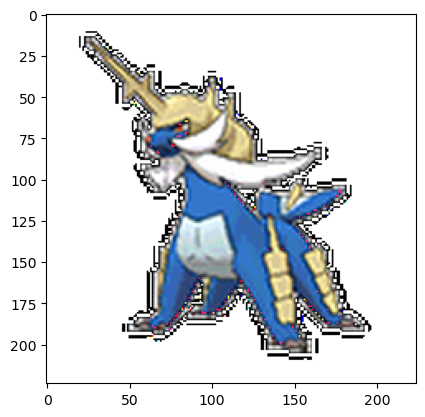

In [38]:
plt.imshow(img_array[df[df['Name'] == 'samurott'].index[0]])

In [305]:
img_array

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [300]:
x1 = img_array[0].copy()
x3 = img_array[1].copy()

In [301]:
x1[x1==0] = 255
x3[x3==0] = 255

In [270]:
img_array[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [286]:
x1 = x1.reshape(-1, 224, 224, 3)
x2 = img_array[0].reshape(-1, 224, 224, 3)
x3 = x3.reshape(-1, 224, 224, 3)

In [288]:
print(x1.shape)
print(x2.shape)
print(x3.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [273]:
img_array[808]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

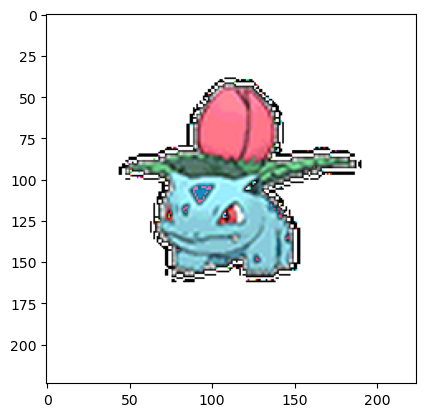

In [304]:
plt.imshow(x3)

In [223]:
img_array

[array([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0, 0],
         [0, 0, 0, 

In [79]:
resized_path = './data/images_resize/'

In [224]:
img = []

for i in range(len(df.index)):
    img.append(mpimg.imread(resized_path + df['Name'][i] + '.png'))

In [225]:
img_array = []

for i in range(len(df.index)):
    img = Image.open(resized_path + df['Name'][i] + '.png').convert('RGB')
    img = np.array(img)
    img_array.append(img)

c:\ProgramData\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [226]:
img_array

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [104]:
import cv2

In [136]:
b = img[0].reshape(-1,224,224,4)

In [137]:
from tqdm import tqdm

In [140]:
X_train = []
image_size = 224
folderPath = os.path.join(resized_path)
for j in tqdm(os.listdir(folderPath)):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
        
        
X_train = np.array(X_train)

100%|██████████| 809/809 [00:00<00:00, 1254.66it/s]


In [142]:
X_train.shape

(809, 224, 224, 3)

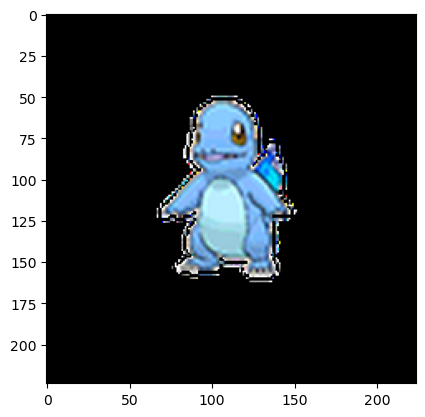

In [444]:
plt.imshow(X_train[95])

In [88]:
model_res = resnet50.ResNet50(weights = 'imagenet')

In [13]:
model_vgg = vgg16.VGG16(weights = 'imagenet')

In [90]:
model_res.compile(loss = 'categorical_crossentory', optimizer = 'adam')

In [94]:
model_vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_4')>

In [93]:
model_vgg.get_layer("fc1")

In [14]:
extract_model = Model(inputs = model_vgg.input,
      outputs = model_vgg.get_layer("fc1").output)

In [186]:
extract = extract_model.predict(X_train)

26/26 [==============================] - 34s 1s/step


In [15]:
extract = extract_model.predict(img_array)

26/26 [==============================] - 34s 1s/step


In [16]:
extract.shape

(809, 4096)

In [318]:
extract[0].shape

(4096,)

In [328]:
df2['Name'][0]

'abomasnow'

In [17]:
df_result = pd.DataFrame(columns = ['Name','similarity'])

In [18]:
df_result

Empty DataFrame
Columns: [Name, similarity]
Index: []

In [418]:
df2[df2['Name'] == 'abomasnow'].index[0]

0

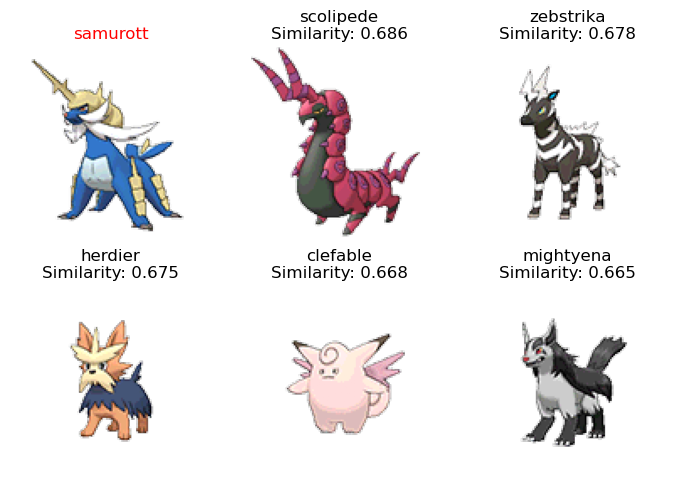

In [27]:
input_name_idx = df[df['Name'] == 'samurott'].index[0]

predicted1 = extract[input_name_idx].reshape(4096)



for i in range(len(extract)):
    
    result_list = []
    
    predicted2 = extract[i].reshape(4096)
    
    result = float(dot(predicted1, predicted2) / (norm(predicted1) * norm(predicted2)))
    # result_list.append(result)
    
    # result_list.sort(reverse=True)
    
    
    
    # print('\033[91m' + df2['Name'][0] + '/' + '\033[94m' + df2['Name'][i] + '\033[37m' + '  ==>  ' +  str(result))
    # print(dot(predicted1, predicted2) / (norm(predicted1) * norm(predicted2)))
    
    # result_list.append(df2['Name'][0])
    result_list.append(df['Name'][i])
    result_list.append(result)
    
    df_result.loc[i] = result_list
    
    df_result = df_result.sort_values(by = 'similarity', ascending = False)
    result = df_result.iloc[2:7].reset_index(drop = True)
    
# display(result)

path = './data/images/images/'
fig,((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(7, 5))
ax = [ax1, ax2, ax3, ax4, ax5, ax6]
img = mpimg.imread(path + df['Name'][input_name_idx] + '.png')
ax1.imshow(img)
ax1.set_title(df['Name'][input_name_idx], color = 'r')
ax1.axis('off')
for i in range(5):
    similarity = str(round(result['similarity'][i], 3))
    img = mpimg.imread(path + result['Name'][i] + '.png')
    ax[i+1].imshow(img)
    ax[i+1].set_title(result['Name'][i] + f'\nSimilarity: {similarity}')
    ax[i+1].axis('off')
plt.tight_layout()
plt.show()
    
# result_list.sort(reverse=True)

In [423]:
result['similarity'][0]

0.6637459397315979

In [404]:
result

Name  similarity
0  tyranitar    0.663746
1    heatran    0.653318
2   zweilous    0.652011
3  tangrowth    0.651714
4    armaldo    0.650799

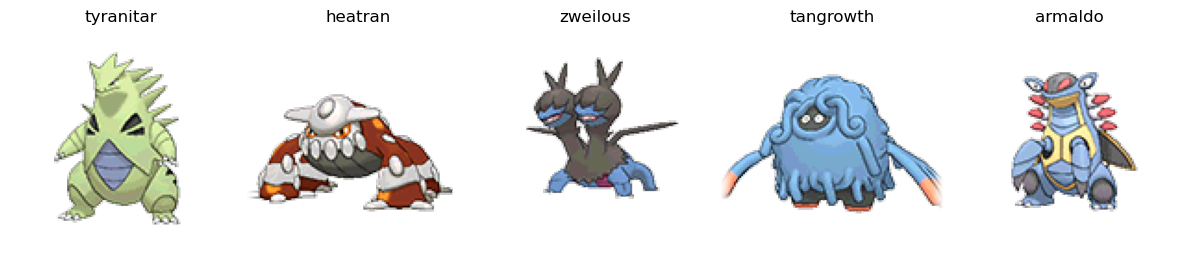

In [407]:
path = './data/images/images/'
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5]
for i in range(5):
    img = mpimg.imread(path+result['Name'][i]+'.png')
    ax[i].imshow(img)
    ax[i].set_title(result['Name'][i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [10]:
path = './data/images/images/'
img_name = sorted(os.listdir('./data/images/images/'))

In [11]:
img_paths = []
for i in img_name:
    img_paths.append(path + i)

In [12]:
img_paths

['./data/images/images/abomasnow.png',
 './data/images/images/abra.png',
 './data/images/images/absol.png',
 './data/images/images/accelgor.png',
 './data/images/images/aegislash-blade.png',
 './data/images/images/aerodactyl.png',
 './data/images/images/aggron.png',
 './data/images/images/aipom.png',
 './data/images/images/alakazam.png',
 './data/images/images/alomomola.png',
 './data/images/images/altaria.png',
 './data/images/images/amaura.png',
 './data/images/images/ambipom.png',
 './data/images/images/amoonguss.png',
 './data/images/images/ampharos.png',
 './data/images/images/anorith.png',
 './data/images/images/araquanid.jpg',
 './data/images/images/arbok.png',
 './data/images/images/arcanine.png',
 './data/images/images/arceus.png',
 './data/images/images/archen.png',
 './data/images/images/archeops.png',
 './data/images/images/ariados.png',
 './data/images/images/armaldo.png',
 './data/images/images/aromatisse.png',
 './data/images/images/aron.png',
 './data/images/images/arti

In [13]:
df2 = df.sort_values(by = ['Name']).reset_index(drop = True)

In [14]:
df2

Name    Type1   Type2
0          abomasnow    Grass     Ice
1               abra  Psychic     NaN
2              absol     Dark     NaN
3           accelgor      Bug     NaN
4    aegislash-blade    Steel   Ghost
..               ...      ...     ...
804          zoroark     Dark     NaN
805            zorua     Dark     NaN
806            zubat   Poison  Flying
807         zweilous     Dark  Dragon
808       zygarde-50   Dragon  Ground

[809 rows x 3 columns]

In [15]:
df2['file_path'] = img_paths

In [16]:
df2

Name    Type1   Type2  \
0          abomasnow    Grass     Ice   
1               abra  Psychic     NaN   
2              absol     Dark     NaN   
3           accelgor      Bug     NaN   
4    aegislash-blade    Steel   Ghost   
..               ...      ...     ...   
804          zoroark     Dark     NaN   
805            zorua     Dark     NaN   
806            zubat   Poison  Flying   
807         zweilous     Dark  Dragon   
808       zygarde-50   Dragon  Ground   

                                    file_path  
0          ./data/images/images/abomasnow.png  
1               ./data/images/images/abra.png  
2              ./data/images/images/absol.png  
3           ./data/images/images/accelgor.png  
4    ./data/images/images/aegislash-blade.png  
..                                        ...  
804          ./data/images/images/zoroark.png  
805            ./data/images/images/zorua.png  
806            ./data/images/images/zubat.png  
807         ./data/images/images/zweilous.png  
808       ./data/images/images/zygarde-50.png  

[809 rows x 4 columns]

In [48]:
from setting import SETTINGS

In [52]:
SETTINGS['path']

'./data/images/images/'

In [2]:
import numpy as np

In [7]:
nploaded = np.load('./data/extracted_array.npy')

FileNotFoundError: [Errno 2] No such file or directory: './data/extracted_array.npy'

In [5]:
np.array(nploaded)

array(['arr_0'], dtype='<U5')

In [6]:
nploaded[0]

KeyError: '0 is not a file in the archive'

In [1]:
import os

In [2]:
folder_dir = './data/extract/'

In [5]:
os.makedirs(folder_dir, exist_ok = True)